# Fisher’s linear discriminant

One way to view a linear classification model is in terms of dimensionality reduction, the main idea will be project the vector $\mathbf{x}\in\mathbb{R}^D$ into 1-dimentional space. Consider the case of two classes $C_1$, $C_2$, we want a project $\mathbf{x}$ it down to one dimension using

$$
\begin{equation}
    y = \mathbf{w}^T\mathbf{x}
\end{equation}
$$

if we place a threshold on $y$ and classify $y\geq −w_0$ as class $C_1$, and otherwise class
$C_2$, then we obtain our standard linear classifier discussed in the previous class.


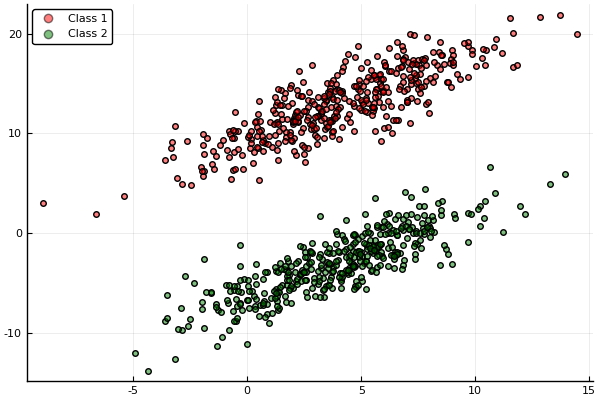

In [88]:
using Random
using Distributions
using Plots
using LinearAlgebra
using LaTeXStrings

#plotly()
pyplot()

μ_1 = [4.0, 13.0];
Σ_1 = [ 12.0 10.0;
        10.0 12.0];

μ_2 = [4.0, -3.0];
Σ_2 = [ 10.0  8.0;
        8.0  10.0];


g1 = MvNormal( μ_1, Σ_1)
g2 = MvNormal( μ_2, Σ_2)

N  = 400
x_1 = rand( g1, N)
x_2 = rand( g2, N)

scatter(x_1[1,:], x_1[2,:],color="red", alpha = 0.5,labels="Class 1")
scatter!(x_2[1,:],x_2[2,:],color="green", alpha =0.5, labels="Class 2")


To begin with, consider a two-class problem in which there are $N_1$ points of class $C_1$ and $N_2$ points of class $C_2$, so that the mean vectors of the two classes are given by:

$$
\mathbf{m}_1=\frac{1}{N_1}\sum_{n\in C_1}x_n\;\;\;\;\;\;\;\mathbf{m}_2=\frac{1}{N_2}\sum_{n\in C_2}x_n.
$$

The simplest measure of the separation of the classes, when projected onto $\mathbf{w}$, is the separation of the projected class means.

$$
m_1-m_2 = \mathbf{w}\left(\mathbf{m_1}-\mathbf{m_2} \right).
$$

Besides if we consider that $\sum_{i}w_i=1$, the solution will be:

$$
\mathbf{w}\propto (\mathbf{m}_1 - \mathbf{m}_2)
$$

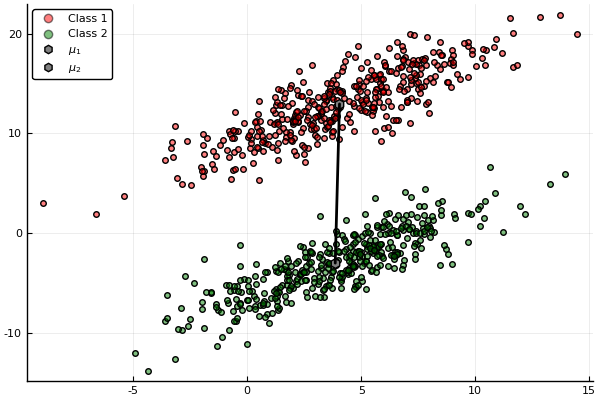

In [89]:
# estimate the mean
mean_1 = mean(x_1, dims=2)
mean_2 = mean(x_2, dims=2)

dir = mean_1 - mean_2

scatter!(mean_1[1,:], mean_1[2,:], color="grey", marker=7, markershape=:hexagon, labels=L"\mu_1")
scatter!(mean_2[1,:], mean_2[2,:], color="grey", marker=7, markershape=:hexagon, labels=L"\mu_2")
plot!([mean_1[1],mean_2[1]], [mean_1[2], mean_2[2]], color="black", label="", linewidth=2)

There is still a problem with this approach, however, two classes that are well separated in the original twodimensional space $(x_1, x_2)$ but that have considerable overlap when projected onto the line joining their means. This difficulty arises from the strongly nondiagonal covariances of the class distributions.

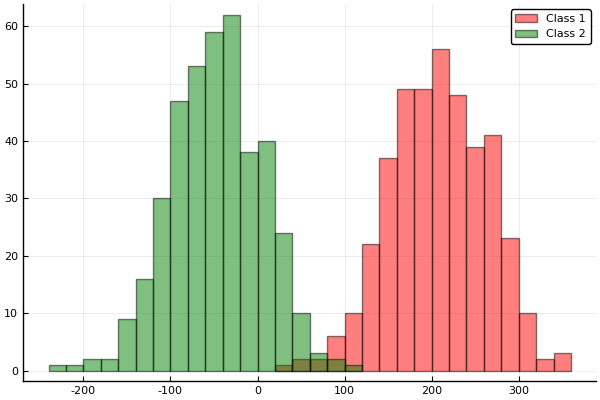

In [90]:
#Project data over dir
proj_1 = x_1' * dir
proj_2 = x_2' * dir

h1 = histogram(proj_1, color="red", alpha=0.5, label="Class 1")
h2 = histogram!(proj_2, color="green", alpha=0.5, label="Class 2")

The projection transforms the set of labelled data points in $\mathbf{x}$ into a labelled set in the one-dimensional space $y$. The within-class variance of the transformed data from class $C_k$ is therefore given by:

$$
s^2_k=\sum_{n\in C_k}(\mathbf{w}^T\mathbf{x}_n-m_k)^2
$$

We can define the total within-class variance for the whole data set to be simply $s^2_1+ s_2^2$. The Fisher criterion is defined to be the ratio of the between-class variance to the within-class variance and is given by:

$$
J(\mathbf{w})=\frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}}.
$$

Where $S_B$ is the between-class covariance matrix and is given by:


$$
\begin{equation}
S_B=(\mathbf{m}_1-\mathbf{m}_2)(\mathbf{m}_1-\mathbf{m}_2)^T,
\end{equation}
$$

and $S_W$ is the total within-class covariance matrix, given by:


$$
S_W = \sum_{n\in C_1}(\mathbf{x}_n - \mathbf{m}_1)(\mathbf{x}_n - \mathbf{m}_1)^T + \sum_{n\in C_2}(\mathbf{x}_n - \mathbf{m}_2)(\mathbf{x}_n - \mathbf{m}_2)^T.
$$

The $\mathbf{w}$ that solve the problem is given by:

$$
\mathbf{w}\propto S_w^{-1}(\mathbf{m}_1-\mathbf{m}_2)
$$


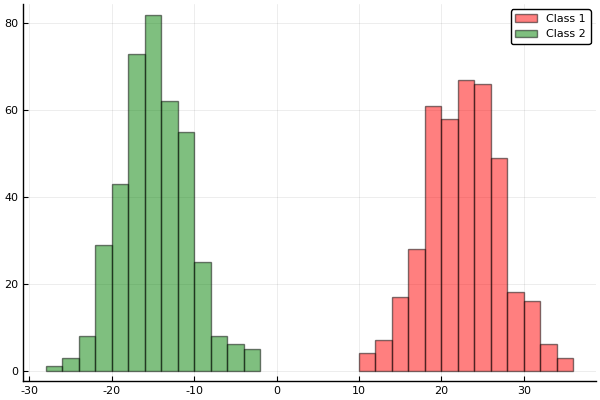

In [91]:
s_1 = cov(x_1')
s_2 = cov(x_2')

S = s_1 + s_2

w = inv(S)*dir

# Project on fishers directions
f_proj_1 = x_1' * w
f_proj_2 = x_2' * w

f_h1 = histogram(f_proj_1, color="red", alpha=0.5, label="Class 1")
f_h2 = histogram!(f_proj_2, color="green", alpha=0.5, label="Class 2")